## Link Dataset
https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction

## Các thư viện cần thiết

In [125]:
import matplotlib.pyplot as plt
from numpy.random import choice
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(561)

## Đọc file dữ liệu

Đọc CSV

In [126]:
dataset = pd.read_csv("./Engineering_graduate_salary.csv")

In [127]:
dataset.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Số record

In [128]:
print("Số mẫu dataset : ",len(dataset))

Số mẫu dataset :  2998


Các cột của dataset

In [129]:
print(list(dataset))

['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']


## Làm sạch dữ liệu

Xóa các cột dữ liệu không cần thiết

In [130]:
unnecessary_column = ["ID","DOB", "10percentage", "10board", "12graduation", 
                      "12percentage", "12board", "CollegeID", "CollegeCityID", 
                      "CollegeCityTier", "CollegeState", "Degree", "GraduationYear",
                      "English", "Logical", "Quant", "Domain", "ComputerProgramming", 
                      "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", 
                      "ElectricalEngg", "TelecomEngg", "CivilEngg", "conscientiousness",
                      "agreeableness", "extraversion", "nueroticism", "openess_to_experience"]
dataset = dataset.drop(unnecessary_column, axis=1)

Format lại các giá trị cần thiết

In [131]:
# Format giới tính
dataset["Gender"] = dataset["Gender"].apply(lambda g:"Male" if g=="m" else "Female")

# Format chuyên ngành, viết hoa chữ đầu tiên của mỗi từ
dataset["Specialization"] = dataset["Specialization"].apply(lambda s:s.title())

# Dataset cuối cùng ta sẽ sử dụng
dataset.head()

,Gender,CollegeTier,Specialization,collegeGPA,Salary
0,Female,1,Instrumentation And Control Engineering,73.82,445000
1,Male,2,Computer Science & Engineering,65.00,110000
2,Male,2,Electronics & Telecommunications,61.94,255000
3,Male,1,Computer Science & Engineering,80.40,420000
4,Female,2,Biotechnology,64.30,200000


## Phương pháp lấy mẫu Bootstrap

Hàm bootstrap

In [271]:
def Bootstrap_Statistic(n,M,x):
    """
    n : kích thước mẫu
    M : số lần lấy mẫu bootstrap
    x : khoảng tin cậy
    """
    # Mảng 2 chiều chứa M mẫu kích thước n
    sample = np.array([np.zeros(n)]*M)
    # Mảng chứa M giá trị trung bình
    sample_mean = np.zeros(M)
    for i in range(M):
        # Chọn ra ngẫu nhiên n mẫu
        sample[i] = choice(dataset["Salary"], size=n)
        sample_mean[i] = np.mean(sample[i])

    # print(sample.shape, sample)
    # print(sample_mean.shape, sample_mean)

    plt.figure(figsize=(10, 8))
    plt.title("Phân bố lấy mẫu")
    # Đồ thị histogram
    sns.histplot(data=sample_mean, kde=True)

    # Mức ý nghĩa
    alpha = (100-x)/2
    # 2 biên khoảng tin cậy
    # Sắp xếp sample_mean tăng dần rồi cắt đi 2 đầu
    sample_mean_asc = np.sort(sample_mean)
    lower_bound = sample_mean_asc[int(alpha/100*M)]
    upper_bound = sample_mean_asc[int((1-alpha/100)*M)]

    # Sử dụng hàm Numpy Percentile
    # lower_bound = np.percentile(sample_mean, alpha)
    # upper_bound = np.percentile(sample_mean, 100-alpha)

    print(">> Dải tin cậy : ",lower_bound," - ",upper_bound)
    plt.axvline(lower_bound, color="red", linewidth=2)
    plt.axvline(upper_bound, color="red", linewidth=2)

Histogram và dải tin cậy của Salary (lương)

>> Dải tin cậy :  294573.0  -  316435.0


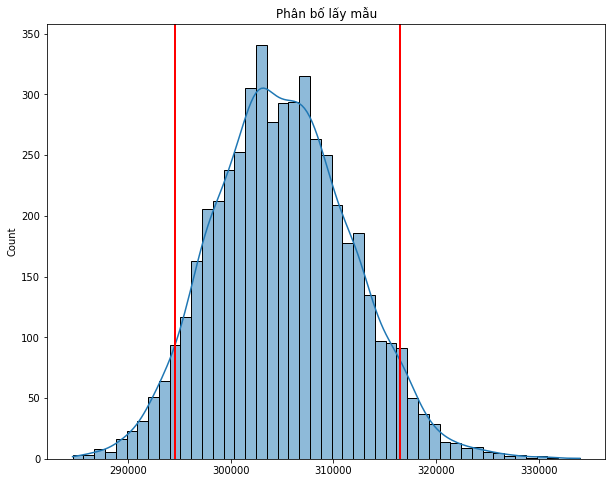

In [272]:
Bootstrap_Statistic(1000, 5000, 90)

## Thống kê mô tả (Descriptive Statistics) 

#### Số lượng kĩ sư Nam nhiều hơn kĩ sư Nữ.

Một điều khá dễ hiểu đối với các khối ngành về kĩ thuật.

<AxesSubplot:title={'center':'Số lượng kĩ sư nam và nữ'}, xlabel='Gender', ylabel='count'>

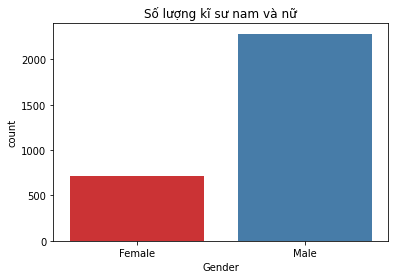

In [157]:
plt.title("Số lượng kĩ sư nam và nữ")
sns.countplot(x="Gender", data=dataset, palette="Set1")

#### 5 ngành học hot nhất và số lượng kĩ sư Nam/Nữ theo học
Sỗ kĩ sư nữ ít hơn kĩ sư nam khá nhiều, chỉ bằng khoảng hơn 1/3 số lượng kĩ sư Nam tương ứng cùng ngành.

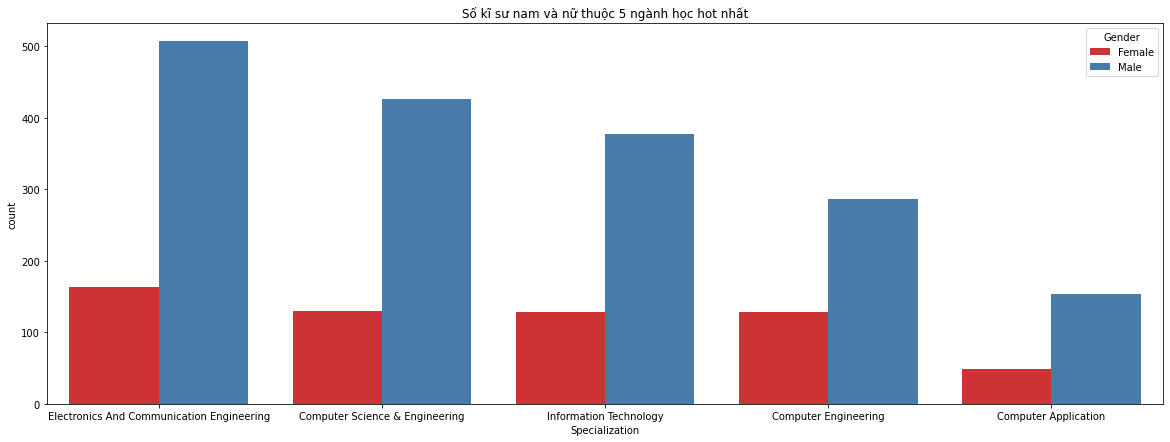

In [264]:
plt.figure(figsize=(20, 7))
plt.title("Số kĩ sư nam và nữ thuộc 5 ngành học hot nhất")
# Dùng thuộc tính order để giới hạn số lượng Group được vẽ ra
plot = sns.countplot(data=dataset, x="Specialization", hue="Gender", palette="Set1",
              order=pd.value_counts(dataset["Specialization"]).iloc[:5].index)

#### Các yếu tố (biến) ảnh hưởng đến nhau như thế nào ?
Đối với Lương, điểm GPA có ảnh hưởng lớn nhất

<AxesSubplot:title={'center':'Bản đồ nhiệt tương quan giữa các biến'}>

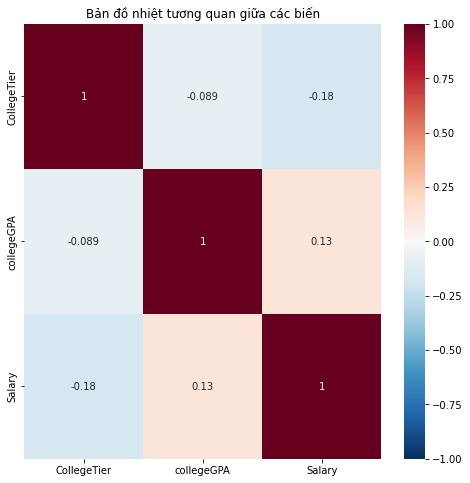

In [151]:
plt.figure(figsize=(8, 8))
plt.title("Bản đồ nhiệt tương quan giữa các biến")
sns.heatmap(dataset.corr(), data=dataset, annot=True, vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r')

#### Phân bố lương

<AxesSubplot:title={'center':'Phân bố lương'}, xlabel='Salary'>

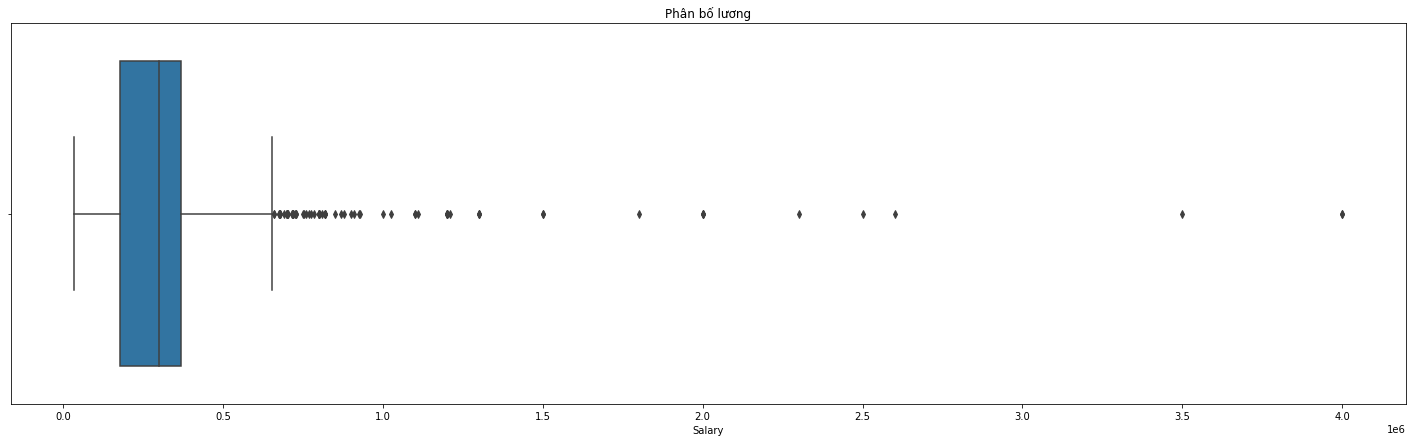

In [137]:
plt.figure(figsize=(25, 7))
plt.title("Phân bố lương")
sns.boxplot(x="Salary", data=dataset)

#### Phân bố lương theo Tier của trường Cao đẳng

Số lượng kĩ sư tốt nghiệp các trường Tier2 nhiều hơn, có mức lương trải dài hơn.

Kĩ sư học ở cả 2 Tier đa số có mức lương dưới 150.000

Mức lương không phụ thuộc hoàn toàn vào Tier của trường mà sẽ phụ thuộc những yếu tố khác, chủ yếu là năng lực bản thân. 

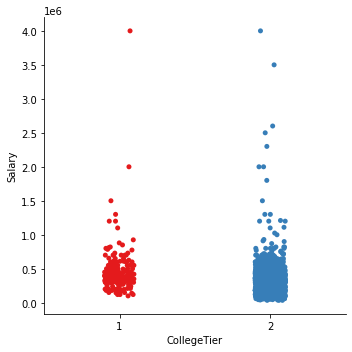

In [182]:
sns.catplot(x="CollegeTier", y="Salary", data=dataset, palette="Set1")

#### Phân bố lương theo cả điểm GPA và Tier trường cao đẳng
Mức lương cao chủ yếu thuộc về khoảng GPA 60-80 và trường Tier 2 

Nên có thể nói rằng học trường Tier1 và điểm GPA cao không thể chắc chắn giúp đạt được mức lương cao

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

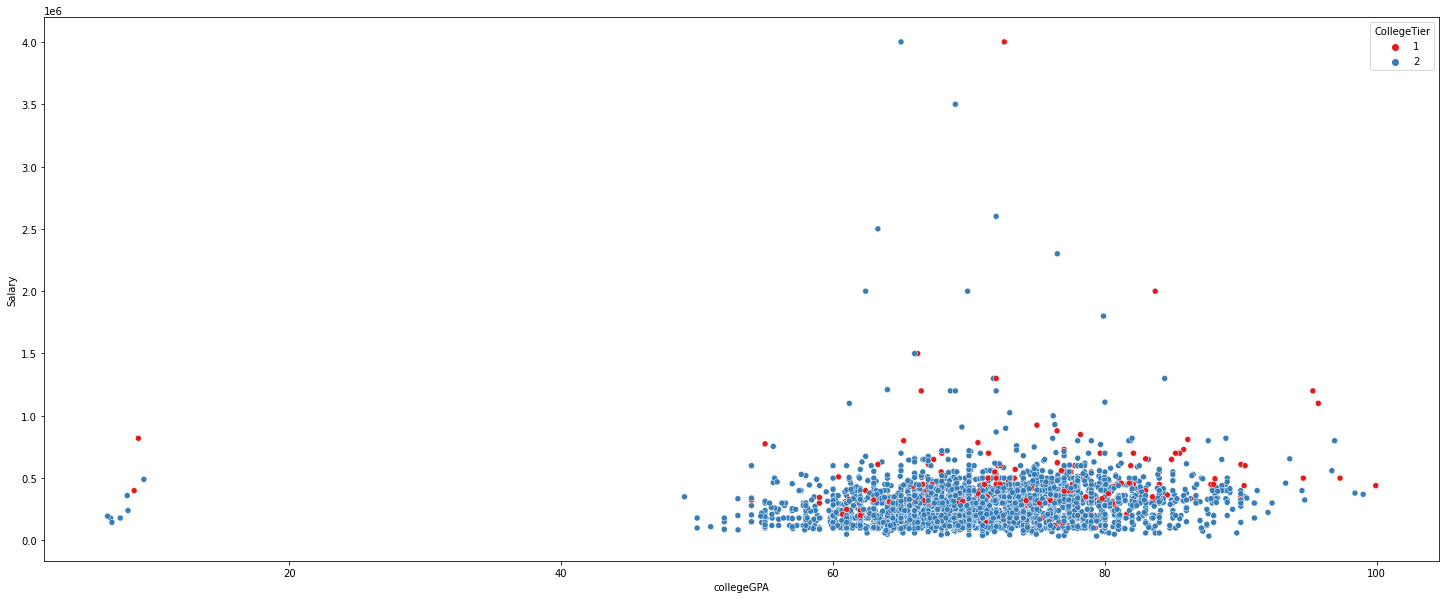

In [184]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x=dataset["collegeGPA"], y=dataset["Salary"],
                hue=dataset["CollegeTier"], palette="Set1")

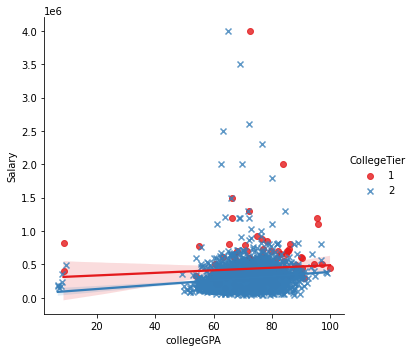

In [260]:
sns.lmplot(x="collegeGPA", y="Salary",hue="CollegeTier", data=dataset,
           markers=["o", "x"], palette="Set1")
